In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
%matplotlib inline

**RMNK**

In [3]:
def create_df(RSS_next,numOfColX,yShape):
    df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
    Cp = RSS_next + 2 * numOfColX
    numOfRowY = yShape
    FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
    df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE},  ignore_index=True)
    return df
def RMNK(X, y, s=None, printt=False, cr_df=False):
    numOfColX = X.shape[1]
    if numOfColX > 1:
        if cr_df:
            w, H_inv, RSS, df = RMNK(X[:,:-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS, df
        else:
            w, H_inv, RSS = RMNK(X[:,:-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS
        
        h = (X[:,:-1].T @ X[:,-1]).reshape(-1,1) 
        η  = X[:,-1].T @ X[:,-1] 
        α = H_inv @ h 
        β  = η  - h.T @ α 
        β_inv = 1 /β  
        γ = X[:,-1].T @ y 
        ν =β_inv * (γ- h.T @ w) 
        w = np.vstack((w - ν * α, ν))  
        H_next_inv = np.vstack((np.hstack((H_inv + β_inv * α @ α.T, (- β_inv * α).reshape(-1, 1))),
                               np.hstack((-β_inv * α.T, β_inv))))
        RSS_next = (RSS - ν.flatten() ** 2 * β.flatten())[0]

    else: 
        H_inv = np.array([[0]])
        η  = β = X[:,-1].T @ X[:,-1]
        β_inv = 1 / β
        α = h = np.array([0])
        γ = X[:,-1].T @ y
        ν = np.array([β_inv * γ])
        w = np.array([ν])
        H_next_inv = np.array(β_inv).reshape(1, 1)
        RSS_next = (y.T @ y - y.T @ X[:,-1].reshape(-1, 1) @ w)[0]
        if cr_df:
            df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
        
    if printt:
        print("\t\t********\n")
        print('КРОК №{}'.format(numOfColX))
        '''print('h_{}:{}'.format(numOfColX, h.reshape(-1,1)[:,0]))
            print('η _{}:{}'.format(numOfColX, η ))
            print('α_{}:{}'.format(numOfColX, α.reshape(-1,1)[:,0]))
            print('β_{}:{}'.format(numOfColX, β))
            print('γ_{}:{}'.format(numOfColX, γ))
            print('ν_{}:{}'.format(numOfColX, ν))'''
        print('θ{}: {}'.format(numOfColX, w[:, 0]))
        print('RSS{}: {}'.format(numOfColX, RSS_next))
        print('H{}^-1:\n{}'.format(numOfColX, H_next_inv))
        print("\t\t********\n")
    
    if cr_df:
        Cp = RSS_next + 2 * numOfColX
        numOfRowY = y.shape[0]
        FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
        df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE},  ignore_index=True)
        return w, H_next_inv, RSS_next, df
    return w, H_next_inv, RSS_next

# **лістинг для моделі Фергюльста**

In [4]:
def print_plot(x, y):
    print("ГРАФІК (ПОТОЧКОВО):")
    for i in range(0, len(x), 1):
        print("(%.2f;%.2f)" % (x[i], y[i]))
    print("КІНЕЦЬ ГРАФІКУ")

МОДЕЛЬ ФЕРГЮЛЬСТА:
m = 0.0001	k = 10	N0 = 100
ШУМ: C = 4
n = 100
t =[0;1000] з h=10

ГРАФІК (ПОТОЧКОВО):
(0.00;99.10)
(10.00;91.03)
(20.00;84.24)
(30.00;78.44)
(40.00;73.44)
(50.00;69.08)
(60.00;65.25)
(70.00;61.85)
(80.00;58.81)
(90.00;56.09)
(100.00;53.63)
(110.00;51.40)
(120.00;49.36)
(130.00;47.50)
(140.00;45.80)
(150.00;44.22)
(160.00;42.76)
(170.00;41.41)
(180.00;40.16)
(190.00;38.99)
(200.00;37.90)
(210.00;36.87)
(220.00;35.91)
(230.00;35.01)
(240.00;34.16)
(250.00;33.36)
(260.00;32.60)
(270.00;31.88)
(280.00;31.20)
(290.00;30.56)
(300.00;29.95)
(310.00;29.36)
(320.00;28.81)
(330.00;28.28)
(340.00;27.77)
(350.00;27.29)
(360.00;26.83)
(370.00;26.39)
(380.00;25.96)
(390.00;25.56)
(400.00;25.17)
(410.00;24.79)
(420.00;24.43)
(430.00;24.09)
(440.00;23.76)
(450.00;23.44)
(460.00;23.13)
(470.00;22.83)
(480.00;22.54)
(490.00;22.26)
(500.00;21.99)
(510.00;21.73)
(520.00;21.48)
(530.00;21.24)
(540.00;21.01)
(550.00;20.78)
(560.00;20.56)
(570.00;20.34)
(580.00;20.14)
(590.00;19.94)
(600.0

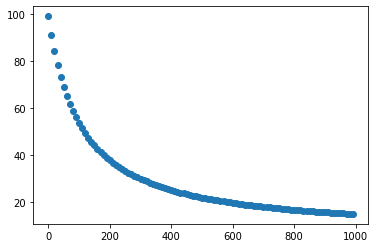

,i,t,N(t),N^2(t),N(t+1)
0,1,0,100.000000,10000.000000,99.1000
1,2,10,91.780885,8423.730828,91.0303
2,3,20,84.874374,7203.659409,84.2389
3,4,30,78.989554,6239.349719,78.4446
4,5,40,73.915564,5463.510642,73.4431
...,...,...,...,...,...
95,96,950,15.338997,235.284832,15.3308
96,97,960,15.257941,232.804762,15.2499
97,98,970,15.178531,230.387798,15.1707
98,99,980,15.100721,228.031774,15.0930


In [5]:
def Fergulst(N, t, μ, k):
    return μ * N * (k - N)
def findtheta(μ,k):
    theta1 = μ * k + 1
    theta2 = -μ
    return np.array([theta1, theta2])
def findparams(theta1, theta2):
    μ = - theta2
    k = (1 - theta1) / theta2
    return μ, k

k_ideal = 10
μ_ideal = 0.0001

N0 = 100

t_start = 0
t_end = 1000

n = 100
n_list = [5, 20, 50]

C = 4
C_list = [1, 2, 5]

theta = findtheta(μ_ideal,k_ideal)
h = int((t_end - t_start) / (n - 1))
t = np.arange(t_start, t_end, h)
N = odeint(Fergulst, N0, t, (μ_ideal, k_ideal))
df = pd.DataFrame()
df['i'] = range(1, n+1)
df['t'] = list(map(int, t))
df['N(t)'] = N.flatten()
df['N^2(t)'] = np.square(N.flatten())
df['N(t+1)'] = np.array(df[['N(t)','N^2(t)']]) @ theta
df['N(t+1)'] = np.round(df['N(t+1)'], C)
X = np.array(df[['N(t)', 'N^2(t)']])
y = np.array(df['N(t+1)'])
print('МОДЕЛЬ ФЕРГЮЛЬСТА:\nm = {}\tk = {}\tN0 = {}'.format(μ_ideal, k_ideal, N0))
print('ШУМ: C = {}'.format(C))
print('n = {}'.format(n))
print('t =[{};{}] з h={}\n'.format(t_start,t_end,h))
plt.scatter(t, y)
print_plot(t, y)
plt.show()
df

In [6]:
import itertools

РМНКО:
		********

КРОК №1
θ1: [0.99550049]
RSS1: 0.8527319137065206
H1^-1:
[[8.39680995e-06]]
		********

		********

КРОК №2
θ2: [ 1.00100002e+00 -9.99996970e-05]
RSS2: 7.595126871873248e-08
H2^-1:
[[ 4.38649438e-05 -6.44928567e-07]
 [-6.44928567e-07  1.17269450e-08]]
		********

Справжні значення/оцінені:θ_1 = 1.001 θ_2 = -0.0001 θ_1* = 1.0010000205310907 θ_2* = -9.999969695630653e-05
Справжні значення/оцінені: m = 0.0001 k = 10 m* = 9.999969695630653e-05 k* = 10.00023561599054


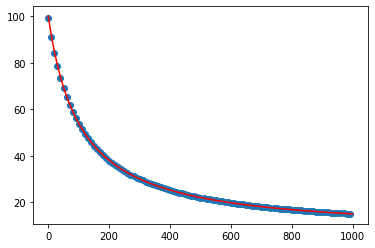

In [7]:
print('РМНКО:')
theta_est = RMNK(X, y, printt=True)[0][:,0]
μ_est, k_est = findparams(*theta_est)
print('Справжні значення/оцінені:θ_1 = {} θ_2 = {} θ_1* = {} θ_2* = {}'.format(*theta,*theta_est))
print('Справжні значення/оцінені: m = {} k = {} m* = {} k* = {}'.format(μ_ideal, k_ideal, μ_est, k_est))
plt.scatter(t, y)
t_plot = np.linspace(t_start, t_end, num=n * 10)
plt.plot(t_plot, odeint(Fergulst, N0, t_plot, (μ_est, k_est)), 'r')
plt.show()
param_df = pd.DataFrame(columns=['C', 'n', 'θ_1*', 'θ_2*', 'm*', 'k*'])
N_CONST = 100
H_CONST = int((t_end - t_start) / N_CONST)
T = np.arange(t_start, t_end, h)

for C,n in itertools.product(C_list, n_list):
        N = odeint(Fergulst, N0, T, (μ_ideal, k_ideal))
        df = pd.DataFrame({'N(t)': N.flatten(),
                          'N^2(t)': np.square(N.flatten())
                          })
        df['N(t+1)'] = np.array(df[['N(t)','N^2(t)']]) @ theta
        
#         df['i'] = range(1, n+1)
#         df['t'] = list(map(int, t))
#         df['N(t)'] = N.flatten()
#         df['N^2(t)'] = np.square(N.flatten())
#         df['N(t+1)'] = np.array(df[['N(t)','N^2(t)']]) @ theta
        df['N(t+1)'] = np.round(df['N(t+1)'], C)
        X = np.array(df[['N(t)', 'N^2(t)']])
        y = np.array(df['N(t+1)'])
        theta_est = RMNK(X, y, printt=False)[0][:,0]
        μ_est, k_est = findparams(*theta_est)
        param_df = param_df.append({'C': C, 'n': n,'θ_1*': theta_est[0], 
                                    'θ_2*': theta_est[1],'m*': μ_est, 'k*': k_est},
                                   ignore_index=True)

In [8]:
param_df

,C,n,θ_1*,θ_2*,m*,k*
0,1.0,5.0,1.001176,-0.000105,0.000105,11.185704
1,1.0,20.0,1.001176,-0.000105,0.000105,11.185704
2,1.0,50.0,1.001176,-0.000105,0.000105,11.185704
3,2.0,5.0,1.000988,-0.000100,0.000100,9.886388
4,2.0,20.0,1.000988,-0.000100,0.000100,9.886388
5,2.0,50.0,1.000988,-0.000100,0.000100,9.886388
6,5.0,5.0,1.001000,-0.000100,0.000100,10.000071
7,5.0,20.0,1.001000,-0.000100,0.000100,10.000071
8,5.0,50.0,1.001000,-0.000100,0.000100,10.000071


In [9]:
from sklearn.metrics import mean_squared_error

Iter: 0, RMSE: 0.3655676980533573, m: 0.00010511557339064022, k: 11.185703666411495
Iter: 1, RMSE: 0.3655676980533573, m: 0.00010511557339064022, k: 11.185703666411495
Iter: 2, RMSE: 0.3655676980533573, m: 0.00010511557339064022, k: 11.185703666411495
Iter: 3, RMSE: 0.05826684581680457, m: 9.995834065118248e-05, k: 9.886388138923088
Iter: 4, RMSE: 0.05826684581680457, m: 9.995834065118248e-05, k: 9.886388138923088
Iter: 5, RMSE: 0.05826684581680457, m: 9.995834065118248e-05, k: 9.886388138923088
Iter: 6, RMSE: 1.93495187930404e-05, m: 0.00010000022594852336, k: 10.000071266013377
Iter: 7, RMSE: 1.93495187930404e-05, m: 0.00010000022594852336, k: 10.000071266013377
Iter: 8, RMSE: 1.93495187930404e-05, m: 0.00010000022594852336, k: 10.000071266013377


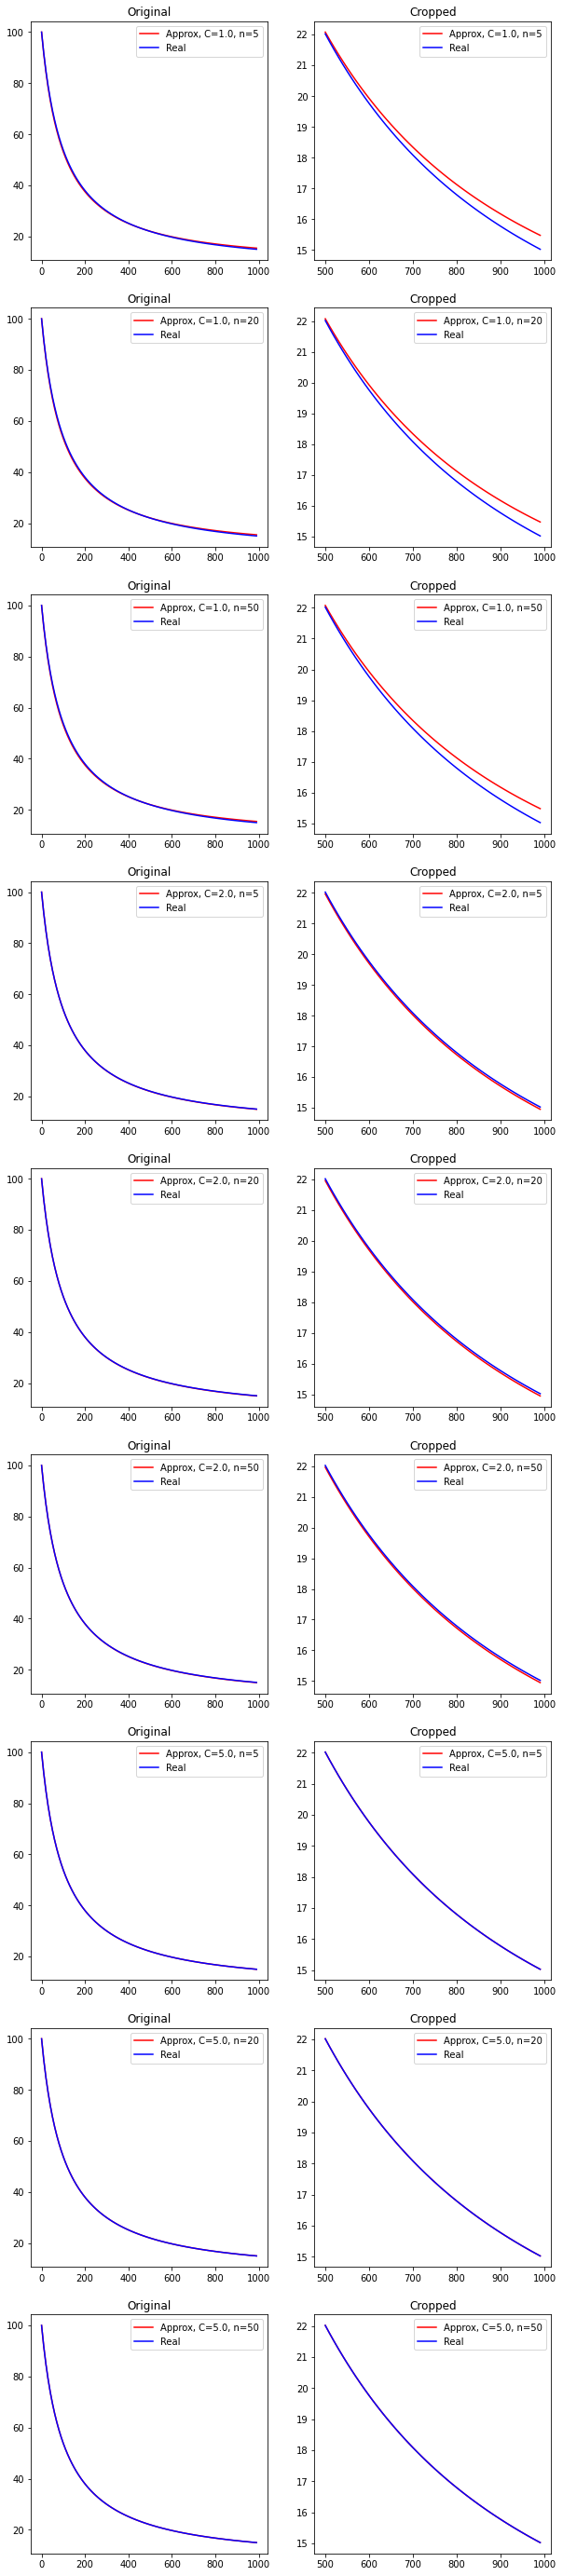

In [10]:
fig, axs = plt.subplots(nrows=param_df.shape[0], ncols=2, figsize=(10, 50))

for i in range(param_df.shape[0]):
    n = int(param_df.iloc[i]['n'])
    μ = param_df.iloc[i]['m*']
    k = param_df.iloc[i]['k*']
    C = param_df.iloc[i]['C']

    N = odeint(Fergulst, N0, T, (μ, k))
    N1 = odeint(Fergulst, N0, T, (μ_ideal, k_ideal))
    
    param_df.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(N1, N))
    axs[i][0].plot(T, N, color='red')
    axs[i][0].plot(T, N1, color='blue')
    
    axs[i][1].plot(T[50:], N[50:], color='red')
    axs[i][1].plot(T[50:], N1[50:], color='blue')
    
    axs[i][0].legend(['Approx, C={}, n={}'.format(C, n), 'Real'])
    axs[i][1].legend(['Approx, C={}, n={}'.format(C, n), 'Real'])
    
    axs[i][0].set_title("Original")
    axs[i][1].set_title("Cropped")
    print('Iter: {}, RMSE: {}, m: {}, k: {}'.format(i, np.sqrt(mean_squared_error(N1, N)), μ, k))
    


In [11]:
param_df

,C,n,θ_1*,θ_2*,m*,k*,RMSE
0,1.0,5.0,1.001176,-0.000105,0.000105,11.185704,0.365568
1,1.0,20.0,1.001176,-0.000105,0.000105,11.185704,0.365568
2,1.0,50.0,1.001176,-0.000105,0.000105,11.185704,0.365568
3,2.0,5.0,1.000988,-0.000100,0.000100,9.886388,0.058267
4,2.0,20.0,1.000988,-0.000100,0.000100,9.886388,0.058267
5,2.0,50.0,1.000988,-0.000100,0.000100,9.886388,0.058267
6,5.0,5.0,1.001000,-0.000100,0.000100,10.000071,0.000019
7,5.0,20.0,1.001000,-0.000100,0.000100,10.000071,0.000019
8,5.0,50.0,1.001000,-0.000100,0.000100,10.000071,0.000019


# **лістинг для коливань**

In [12]:
from scipy.interpolate import interp1d

In [13]:
plt.style.use('ggplot')

delta = 0.005 w0^2 = 0.01 x01 = 5 x02 = 2
C = 2
n = 100
t =[0;1000] з кроком h=10

ГРАФІК (ПОТОЧКОВО):
(0.00;2.97)
(10.00;17.51)
(20.00;15.34)
(30.00;-0.04)
(40.00;-13.92)
(50.00;-14.30)
(60.00;-2.13)
(70.00;10.74)
(80.00;13.00)
(90.00;3.66)
(100.00;-7.99)
(110.00;-11.54)
(120.00;-4.66)
(130.00;5.64)
(140.00;10.03)
(150.00;5.22)
(160.00;-3.70)
(170.00;-8.53)
(180.00;-5.44)
(190.00;2.12)
(200.00;7.10)
(210.00;5.40)
(220.00;-0.86)
(230.00;-5.78)
(240.00;-5.17)
(250.00;-0.09)
(260.00;4.58)
(270.00;4.80)
(280.00;0.80)
(290.00;-3.52)
(300.00;-4.35)
(310.00;-1.30)
(320.00;2.60)
(330.00;3.85)
(340.00;1.61)
(350.00;-1.82)
(360.00;-3.34)
(370.00;-1.79)
(380.00;1.18)
(390.00;2.83)
(400.00;1.85)
(410.00;-0.66)
(420.00;-2.35)
(430.00;-1.83)
(440.00;0.25)
(450.00;1.91)
(460.00;1.74)
(470.00;0.07)
(480.00;-1.50)
(490.00;-1.61)
(500.00;-0.30)
(510.00;1.15)
(520.00;1.45)
(530.00;0.46)
(540.00;-0.85)
(550.00;-1.28)
(560.00;-0.56)
(570.00;0.59)
(580.00;1.11)
(590.00;0.61)
(600.00;-0.38)
(610.00;-0.94)
(

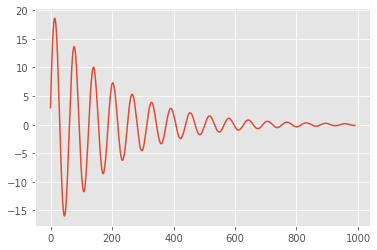

,i,t,x(t),x(t+1),x(t+2)
0,1,0,5.000000,7.000000,2.97
1,2,10,18.790761,19.900744,17.51
2,3,20,14.828501,14.162003,15.34
3,4,30,-1.730645,-3.421428,-0.04
4,5,40,-15.199781,-16.338055,-13.92
...,...,...,...,...,...
95,96,950,0.138694,0.153153,0.12
96,97,960,0.164024,0.163838,0.16
97,98,970,0.043435,0.030158,0.06
98,99,980,-0.103682,-0.117186,-0.09


In [14]:
def ZgasColiv(x, t, δ, ω0_sqr):
    return [x[1],  - 2 * δ * x[1] - ω0_sqr * x[0]]        
def findtheta(δ,ω0_sqr):
    d = 1 + 2 * δ
    theta1 = (2 + 2 * δ - ω0_sqr) / d
    theta2 = - 1 / d
    return np.array([theta1, theta2])
def findparams(theta1, theta2):
    δ = - (1 / theta2 + 1) / 2
    ω0_sqr = 1 - 1 / theta2 + theta1 / theta2
    return δ, ω0_sqr
 
δ = 0.005
ω0_sqr = 0.01
x0 = 5
x00 = 2
t_start = 0
t_end = 1000
n = 100
n_list = [10, 20, 40]
C = 2
C_list = [1, 3, 7]

theta = findtheta(δ,ω0_sqr)

h = int((t_end - t_start) / n)

t = np.arange(t_start, t_end, h)
x = odeint(ZgasColiv, np.array([x0, x00]), t, (δ, ω0_sqr))
x1 = x0 + x00
x11 = x00
x_1 = odeint(ZgasColiv, np.array([x1, x11]), t+1, (δ, ω0_sqr))
df = pd.DataFrame()
df['i'] = range(1, n+1)
df['t'] = list(map(int, t))
df['x(t)'] = x[:,0].flatten()
df['x(t+1)'] = x_1[:,0].flatten()
df['x(t+2)'] = np.array(df[['x(t)','x(t+1)']]) @ theta
df['x(t+2)'] = np.round(df['x(t+2)'], C)
X = np.array(df[['x(t)', 'x(t+1)']])
y = np.array(df['x(t+2)'])  
    
print('delta = {} w0^2 = {} x01 = {} x02 = {}'.format(δ, ω0_sqr, x0, x00))
print('C = {}'.format(C))
print('n = {}'.format(n))
print('t =[{};{}] з кроком h={}\n'.format(t_start,t_end,h))
#plt.scatter(t, y)
# plt.plot(t, y)
f = interp1d(t, y, kind='quadratic')
t_new = np.linspace(t[0], t[-1], 10000)
plt.plot(t_new, f(t_new))
print_plot(t, y)
plt.show()
df

In [15]:
print('РМНКО')
theta_pred = RMNK(X, y, printt=True)[0][:,0]
δ_pred, ω0_sqr_pred = findparams(*theta_pred)
print('Справжні значення/оцінені:θ_1 = {} θ_2 = {} θ_1* = {} θ_2* = {}'.format(*theta,*theta_pred))
print('Справжні значення/оцінені: delta = {} w0^2 = {} delta* = {} w0^2* = {}'.format(δ, 
                                                                                      ω0_sqr,
                                                                                      δ_pred,
                                                                                      ω0_sqr_pred))
# plt.scatter(t, y)
# print_plot(t, y)
# t_plot = np.arange(t_start, t_end, h / 10) # n*10
# plt.plot(t_new, f(t_new), c='b')
# plt.plot(t_plot, odeint(ZgasColiv, np.array([x0, x00]), t_plot, (δ_pred, ω0_sqr_pred))[:,0], 'r')
# print_plot(t_plot, odeint(ZgasColiv, np.array([x0, x00]),t_plot, (δ_pred, ω0_sqr_pred))[:,0])
# plt.show()
N_CONST = 100
H_CONST = int((t_end - t_start) / N_CONST)
T = np.arange(t_start, t_end, h)

param_df = pd.DataFrame(columns=['C', 'n', 'θ_1*', 'θ_2*','delta*', 'w0_sqr*'])
for C,n in itertools.product(C_list, n_list):
        x = odeint(ZgasColiv, np.array([x0, x00]), T, (δ, ω0_sqr))
        x1 = x0 + x00
        x11 = x00
        x_1 = odeint(ZgasColiv, np.array([x1, x11]), T+1, (δ, ω0_sqr))
        df = pd.DataFrame()
#         df['i'] = range(1, n+1)
#         df['t'] = list(map(int, T))
        df['x(t)'] = x[:,0].flatten()
        df['x(t+1)'] = x_1[:,0].flatten()
        df['x(t+2)'] = np.array(df[['x(t)','x(t+1)']]) @ theta
        df['x(t+2)'] = np.round(df['x(t+2)'], C)
        X = np.array(df[['x(t)', 'x(t+1)']])
        y = np.array(df['x(t+2)'])  
        theta_pred = RMNK(X, y, printt=False)[0][:,0]
        δ_pred, ω0_sqr_pred = findparams(*theta_pred)
        param_df =param_df.append({'C': C, 'n': n,'θ_1*': theta_pred[0],
                                   'θ_2*': theta_pred[1],'delta*': δ_pred, 
                                   'w0_sqr*': ω0_sqr_pred},
                                  ignore_index=True)

РМНКО
		********

КРОК №1
θ1: [0.95803427]
RSS1: 19.461172259764908
H1^-1:
[[0.00045037]]
		********

		********

КРОК №2
θ2: [ 1.97971139 -0.98962102]
RSS2: 0.0007640499713588156
H2^-1:
[[ 0.05408872 -0.05195539]
 [-0.05195539  0.05032524]]
		********

Справжні значення/оцінені:θ_1 = 1.98019801980198 θ_2 = -0.9900990099009901 θ_1* = 1.9797113877056112 θ_2* = -0.98962101756138
Справжні значення/оцінені: delta = 0.005 w0^2 = 0.01 delta* = 0.005243917749542026 w0^2* = 0.010013560423552725


In [16]:
param_df

,C,n,θ_1*,θ_2*,delta*,w0_sqr*
0,1.0,10.0,1.978650,-0.989783,0.005161,0.011248
1,1.0,20.0,1.978650,-0.989783,0.005161,0.011248
2,1.0,40.0,1.978650,-0.989783,0.005161,0.011248
3,3.0,10.0,1.980308,-0.990207,0.004945,0.009996
4,3.0,20.0,1.980308,-0.990207,0.004945,0.009996
5,3.0,40.0,1.980308,-0.990207,0.004945,0.009996
6,7.0,10.0,1.980198,-0.990099,0.005000,0.010000
7,7.0,20.0,1.980198,-0.990099,0.005000,0.010000
8,7.0,40.0,1.980198,-0.990099,0.005000,0.010000


Iter: 0, RMSE: 0.32998464768382385, δ: 0.005161176320393923, ω0_sqr: 0.011247833977011013
Iter: 1, RMSE: 0.32998464768382385, δ: 0.005161176320393923, ω0_sqr: 0.011247833977011013
Iter: 2, RMSE: 0.32998464768382385, δ: 0.005161176320393923, ω0_sqr: 0.011247833977011013
Iter: 3, RMSE: 0.3363220249413372, δ: 0.004945069257048851, ω0_sqr: 0.009996443532544808
Iter: 4, RMSE: 0.3363220249413372, δ: 0.004945069257048851, ω0_sqr: 0.009996443532544808
Iter: 5, RMSE: 0.3363220249413372, δ: 0.004945069257048851, ω0_sqr: 0.009996443532544808
Iter: 6, RMSE: 0.33466750252714966, δ: 0.00499999601970047, ω0_sqr: 0.010000000587649494
Iter: 7, RMSE: 0.33466750252714966, δ: 0.00499999601970047, ω0_sqr: 0.010000000587649494
Iter: 8, RMSE: 0.33466750252714966, δ: 0.00499999601970047, ω0_sqr: 0.010000000587649494


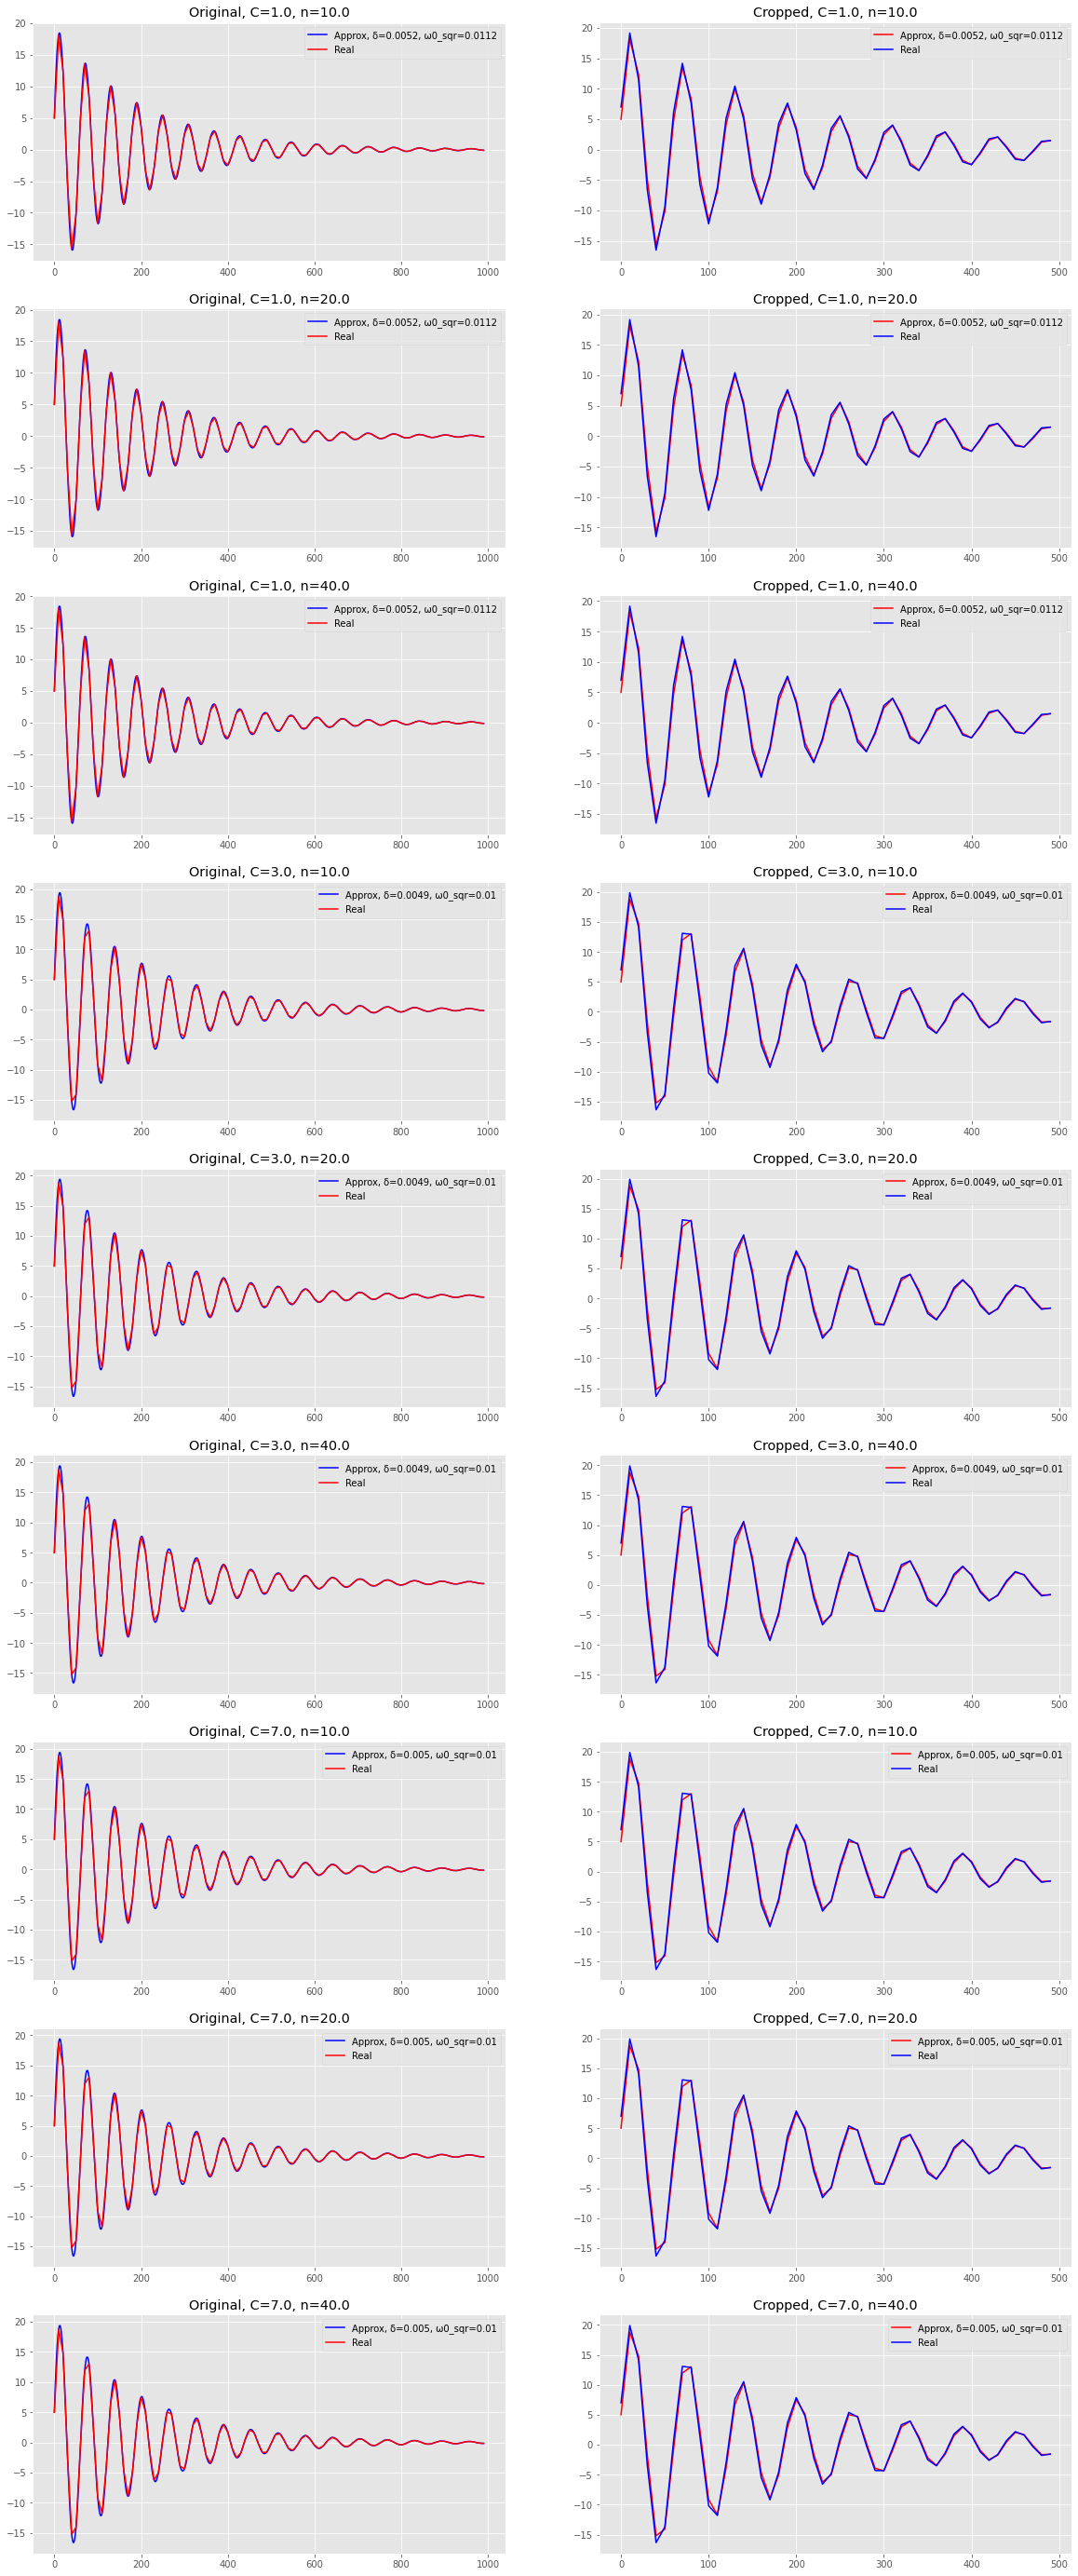

In [17]:
fig, axs = plt.subplots(nrows=param_df.shape[0], ncols=2, figsize=(20, 50))

for i in range(param_df.shape[0]):
    δ = param_df.iloc[i]['delta*']
    ω0_sqr = param_df.iloc[i]['w0_sqr*']
    C = param_df.iloc[i]['C']
    n = param_df.iloc[i]['n']
    
    x = odeint(ZgasColiv, np.array([x0, x00]), T, (δ, ω0_sqr))
    x1 = x0 + x00
    x11 = x00
    x_1 = odeint(ZgasColiv, np.array([x1, x11]), T+1, (δ, ω0_sqr))
        
    param_df.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(x, x_1))
    f = interp1d(T, x[:, 0], kind='quadratic')
    t_new = np.linspace(T[0], T[-1], 10000)
    axs[i][0].plot(t_new, f(t_new), color='blue')
    axs[i][0].plot(T, x[:, 0], color='red')
    #axs[i][0].plot(T, x_1[:, 0], color='blue')
    
    axs[i][1].plot(T[:50], x[:50, 0], color='red')
    axs[i][1].plot(T[:50], x_1[:50, 0], color='blue')
    
    axs[i][0].legend(['Approx, δ={}, ω0_sqr={}'.format(round(δ, 4), round(ω0_sqr, 4)), 'Real'])
    axs[i][1].legend(['Approx, δ={}, ω0_sqr={}'.format(round(δ, 4), round(ω0_sqr, 4)), 'Real'])
    
    axs[i][0].set_title("Original, C={}, n={}".format(C, n))
    axs[i][1].set_title("Cropped, C={}, n={}".format(C, n))
    
    print('Iter: {}, RMSE: {}, δ: {}, ω0_sqr: {}'.format(i, np.sqrt(mean_squared_error(x_1, x)), 
                                                         δ, ω0_sqr))

In [18]:
param_df

,C,n,θ_1*,θ_2*,delta*,w0_sqr*,RMSE
0,1.0,10.0,1.978650,-0.989783,0.005161,0.011248,0.329985
1,1.0,20.0,1.978650,-0.989783,0.005161,0.011248,0.329985
2,1.0,40.0,1.978650,-0.989783,0.005161,0.011248,0.329985
3,3.0,10.0,1.980308,-0.990207,0.004945,0.009996,0.336322
4,3.0,20.0,1.980308,-0.990207,0.004945,0.009996,0.336322
5,3.0,40.0,1.980308,-0.990207,0.004945,0.009996,0.336322
6,7.0,10.0,1.980198,-0.990099,0.005000,0.010000,0.334668
7,7.0,20.0,1.980198,-0.990099,0.005000,0.010000,0.334668
8,7.0,40.0,1.980198,-0.990099,0.005000,0.010000,0.334668


In [19]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6


def create_df(RSS_next, numOfColX, yShape):
    df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])
    Cp = RSS_next + 2 * numOfColX
    numOfRowY = yShape
    FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
    df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE}, ignore_index = True)
    return df


def RMNKO(X, y, s=None, printt=False, cr_df=False):
    numOfColX = X.shape[1]
    if numOfColX > 1:
        if cr_df:
            w, H_inv, RSS, df = RMNKO(X[:, :-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS, df
        else:
            w, H_inv, RSS = RMNKO(X[:, :-1], y, s, printt, cr_df)
            if s is not None and numOfColX > s:
                return w, H_inv, RSS

        h = (X[:, :-1].T @ X[:, -1]).reshape(-1, 1)
        η = X[:, -1].T @ X[:, -1]
        α = H_inv @ h
        β = η - h.T @ α
        β_inv = 1 / β
        γ = X[:, -1].T @ y
        ν = β_inv * (γ - h.T @ w)
        w = np.vstack((w - ν * α, ν))
        H_next_inv = np.vstack((np.hstack((H_inv + β_inv * α @ α.T, (- β_inv * α).reshape(-1, 1))),
                                np.hstack((-β_inv * α.T, β_inv))))
        RSS_next = (RSS - ν.flatten() ** 2 * β.flatten())[0]

    else:
        H_inv = np.array([[0]])
        η = β = X[:, -1].T @ X[:, -1]
        β_inv = 1 / β
        α = h = np.array([0])
        γ = X[:, -1].T @ y
        ν = np.array([β_inv * γ])
        w = np.array([ν])
        H_next_inv = np.array(β_inv).reshape(1, 1)
        RSS_next = (y.T @ y - y.T @ X[:, -1].reshape(-1, 1) @ w)[0]
        if cr_df:
            df = pd.DataFrame(columns=['s', 'RSS', 'Cp', 'FPE'])

    if printt:
        print('Крок №{}'.format(numOfColX))
        print('---θ{}: {}'.format(numOfColX, w[:, 0]))
        print('---H{}inv:\n{}'.format(numOfColX, H_next_inv))
        print('---RSS{}: {}'.format(numOfColX, RSS_next))

    if cr_df:
        Cp = RSS_next + 2 * numOfColX
        numOfRowY = y.shape[0]
        FPE = (numOfRowY + numOfColX) / (numOfRowY - numOfColX) * RSS_next
        df = df.append({'s': numOfColX, 'RSS': RSS_next, 'Cp': Cp, 'FPE': FPE}, ignore_index = True)
        return w, H_next_inv, RSS_next, df
    return w, H_next_inv, RSS_next

δ = 0.005 ω0^2 = 0.01 x0 = 5 x00 = 2
C = 2
n = 100
t =[0;1000] з h=10



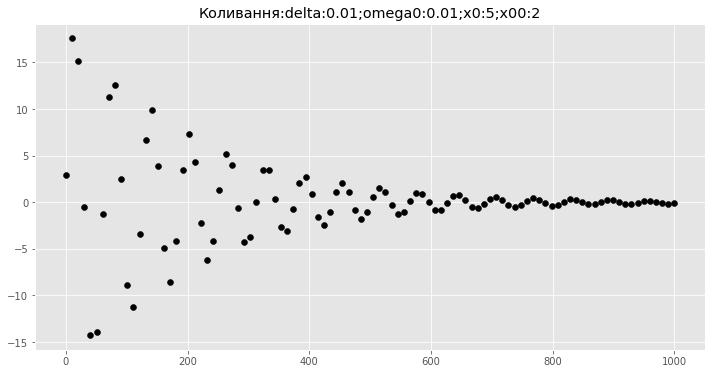

      i     t       x(t)     x(t+1)  x(t+2)
0     1     0   5.000000   7.000000    2.97
1     2    10  18.845271  19.939029   17.57
2     3    20  14.574472  13.874824   15.12
3     4    30  -2.267788  -3.965348   -0.56
4     5    40 -15.471944 -16.559489  -14.24
..  ...   ...        ...        ...     ...
95   96   959   0.166296   0.166775    0.16
96   97   969   0.048257   0.035219    0.06
97   98   979  -0.101425  -0.115068   -0.09
98   99   989  -0.146385  -0.148422   -0.14
99  100  1000  -0.056637  -0.046370   -0.07

[100 rows x 5 columns]
РМНКО
Крок №1
---θ1: [0.95804712]
---H1inv:
[[0.00045498]]
---RSS1: 19.349874546066076
Крок №2
---θ2: [ 1.98135631 -0.99121015]
---H2inv:
[[ 0.05457455 -0.05242195]
 [-0.05242195  0.05077759]]
---RSS2: 0.0008349207125100122
Правдиві значення/Оцінка:θ_1 = 1.98 θ_2 = -0.99 θ_1* = 1.9813563100637288 θ_2* = -0.9912101461001732
Правдиві значення/Оцінка: δ = 0.005 ω0^2 = 0.01 δ* = 0.004394926949913391 ω0^2* = 0.009853836036444408


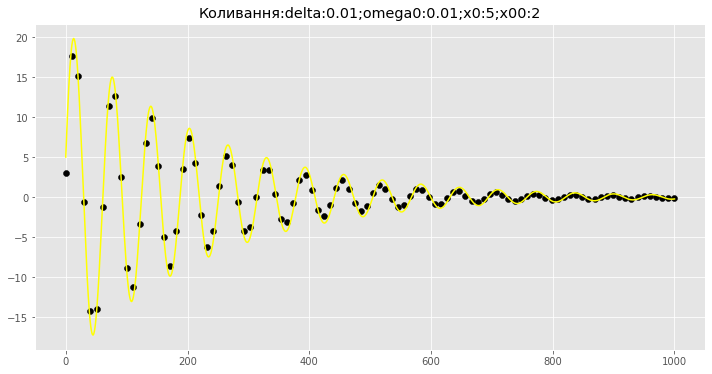

In [20]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from pylab import rcParams
# from RMNKO import create_df, RMNKO
rcParams['figure.figsize'] = 12, 6
def ZgasColiv(x, t, δ, ω0_sqr):
    return [x[1], - 2 * δ * x[1] - ω0_sqr * x[0]]

def findtheta(δ, ω0_sqr):
    '''d = 1 + 2 * δ
    theta1 = (2 + 2 * δ - ω0_sqr) / d
    theta2 = - 1 / d
    '''
    theta1 = (2 - 2 * δ - ω0_sqr)
    theta2 = - 1 + 2 * δ

    return np.array([theta1, theta2])

def findparams(theta1, theta2):
    δ = - (1 / theta2 + 1) / 2
    ω0_sqr = 1 - 1 / theta2 + theta1 / theta2
    δ =  (theta2 + 1) / 2
    ω0_sqr = 1 - theta2 - theta1
    return δ, ω0_sqr

δ = 0.005
ω0_sqr = 0.01
x0 = 5
x00 = 2
t_start = 0
t_end = 1000
n = 100
n_list = [10, 20, 40]
C = 2
C_list = [1, 3, 7]

theta = findtheta(δ, ω0_sqr)
h = int((t_end - t_start) / (n - 1))
t = np.linspace(t_start, t_end, num=n)
x = odeint(ZgasColiv, np.array([x0, x00]), t, (δ, ω0_sqr))
x1 = x0 + x00
x11 = x00
x_1 = odeint(ZgasColiv, np.array([x1, x11]), t + 1, (δ, ω0_sqr))
df = pd.DataFrame()
df['i'] = range(1, n + 1)
df['t'] = list(map(int, t))
df['x(t)'] = x[:, 0].flatten()
df['x(t+1)'] = x_1[:, 0].flatten()
df['x(t+2)'] = np.array(df[['x(t)', 'x(t+1)']]) @ theta
df['x(t+2)'] = np.round(df['x(t+2)'], C)
X = np.array(df[['x(t)', 'x(t+1)']])
y = np.array(df['x(t+2)'])

print('δ = {} ω0^2 = {} x0 = {} x00 = {}'.format(δ, ω0_sqr, x0, x00))
print('C = {}'.format(C))
print('n = {}'.format(n))
print('t =[{};{}] з h={}\n'.format(t_start, t_end, h))

z = 'Коливання:' + 'delta:' + str(round(δ, 2)) + ';omega0:' + str(ω0_sqr) + ';x0:' + str(x0) + ';x00:' + str(x00)

plt.title(z)
plt.scatter(t, y,color = 'black')
plt.show()
print(df)
handle = open("text1.txt", "w")
ziz = df.values.tolist()
for item in ziz:
    handle.write("%s\n" % item)
handle.close()

print('РМНКО')
theta_pred = RMNKO(X, y, printt=True)[0][:, 0]
δ_pred, ω0_sqr_pred = findparams(*theta_pred)
print('Правдиві значення/Оцінка:θ_1 = {} θ_2 = {} θ_1* = {} θ_2* = {}'.format(*theta, *theta_pred))
print('Правдиві значення/Оцінка: δ = {} ω0^2 = {} δ* = {} ω0^2* = {}'.format(δ, ω0_sqr, δ_pred, ω0_sqr_pred))
plt.title(z)
plt.scatter(t, y,color = 'black')
t_plot = np.linspace(t_start, t_end, num=n * 10)
plt.plot(t_plot, odeint(ZgasColiv, np.array([x0, x00]), t_plot, (δ_pred, ω0_sqr_pred))[:, 0], 'r', color='yellow')
plt.show()

param_df = pd.DataFrame(columns=['C', 'n', 'θ_1*', 'θ_2*', 'δ*', 'ω0_sqr*'])
for C in C_list:
    for n in n_list:
        h = int((t_end - t_start) / (n - 1))
        t = np.linspace(t_start, t_end, num=n)
        x = odeint(ZgasColiv, np.array([x0, x00]), t, (δ, ω0_sqr))
        x1 = x0 + x00
        x11 = x00
        x_1 = odeint(ZgasColiv, np.array([x1, x11]), t + 1, (δ, ω0_sqr))
        df = pd.DataFrame()
        df['i'] = range(1, n + 1)
        df['t'] = list(map(int, t))
        df['x(t)'] = x[:, 0].flatten()
        df['x(t+1)'] = x_1[:, 0].flatten()
        df['x(t+2)'] = np.array(df[['x(t)', 'x(t+1)']]) @ theta
        df['x(t+2)'] = np.round(df['x(t+2)'], C)
        X = np.array(df[['x(t)', 'x(t+1)']])
        y = np.array(df['x(t+2)'])
        theta_pred = RMNKO(X, y, printt=False)[0][:, 0]
        δ_pred, ω0_sqr_pred = findparams(*theta_pred)
        param_df = param_df.append(
            {'C': C, 'n': n, 'θ_1*': theta_pred[0], 'θ_2*': theta_pred[1], 'δ*': δ_pred, 'ω0_sqr*': ω0_sqr_pred},
            ignore_index=True)

In [21]:
param_df

,C,n,θ_1*,θ_2*,δ*,ω0_sqr*
0,1.0,10.0,1.953314,-0.965644,0.017178,0.012330
1,1.0,20.0,1.978974,-0.987170,0.006415,0.008196
2,1.0,40.0,1.989126,-0.999496,0.000252,0.010370
3,3.0,10.0,1.980026,-0.990012,0.004994,0.009985
4,3.0,20.0,1.980109,-0.990103,0.004949,0.009993
5,3.0,40.0,1.980017,-0.989997,0.005001,0.009980
6,7.0,10.0,1.980000,-0.990000,0.005000,0.010000
7,7.0,20.0,1.980000,-0.990000,0.005000,0.010000
8,7.0,40.0,1.980000,-0.990000,0.005000,0.010000


In [22]:
param_df = param_df.astype(float)

Iter: 0, RMSE: 0.20563201143466608, δ: 0.017178246128573715, ω0_sqr: 0.012329566888576782
Iter: 1, RMSE: 0.3002561737813587, δ: 0.006414989673134031, ω0_sqr: 0.0081958015576582
Iter: 2, RMSE: 0.8967348500018847, δ: 0.0002520246522381142, ω0_sqr: 0.010369740444212017
Iter: 3, RMSE: 0.3348452007652243, δ: 0.004994050903818381, ω0_sqr: 0.009985492316446187
Iter: 4, RMSE: 0.33621196222939176, δ: 0.004948692795382903, ω0_sqr: 0.009993497058990775
Iter: 5, RMSE: 0.33462850197015387, δ: 0.005001304743937507, ω0_sqr: 0.009980332960523475
Iter: 6, RMSE: 0.33466723539907245, δ: 0.005000005030822985, ω0_sqr: 0.010000002189803459
Iter: 7, RMSE: 0.3346671695115486, δ: 0.0050000071513869315, ω0_sqr: 0.010000000028814071
Iter: 8, RMSE: 0.33466759430268245, δ: 0.004999993016735482, ω0_sqr: 0.009999998779795183


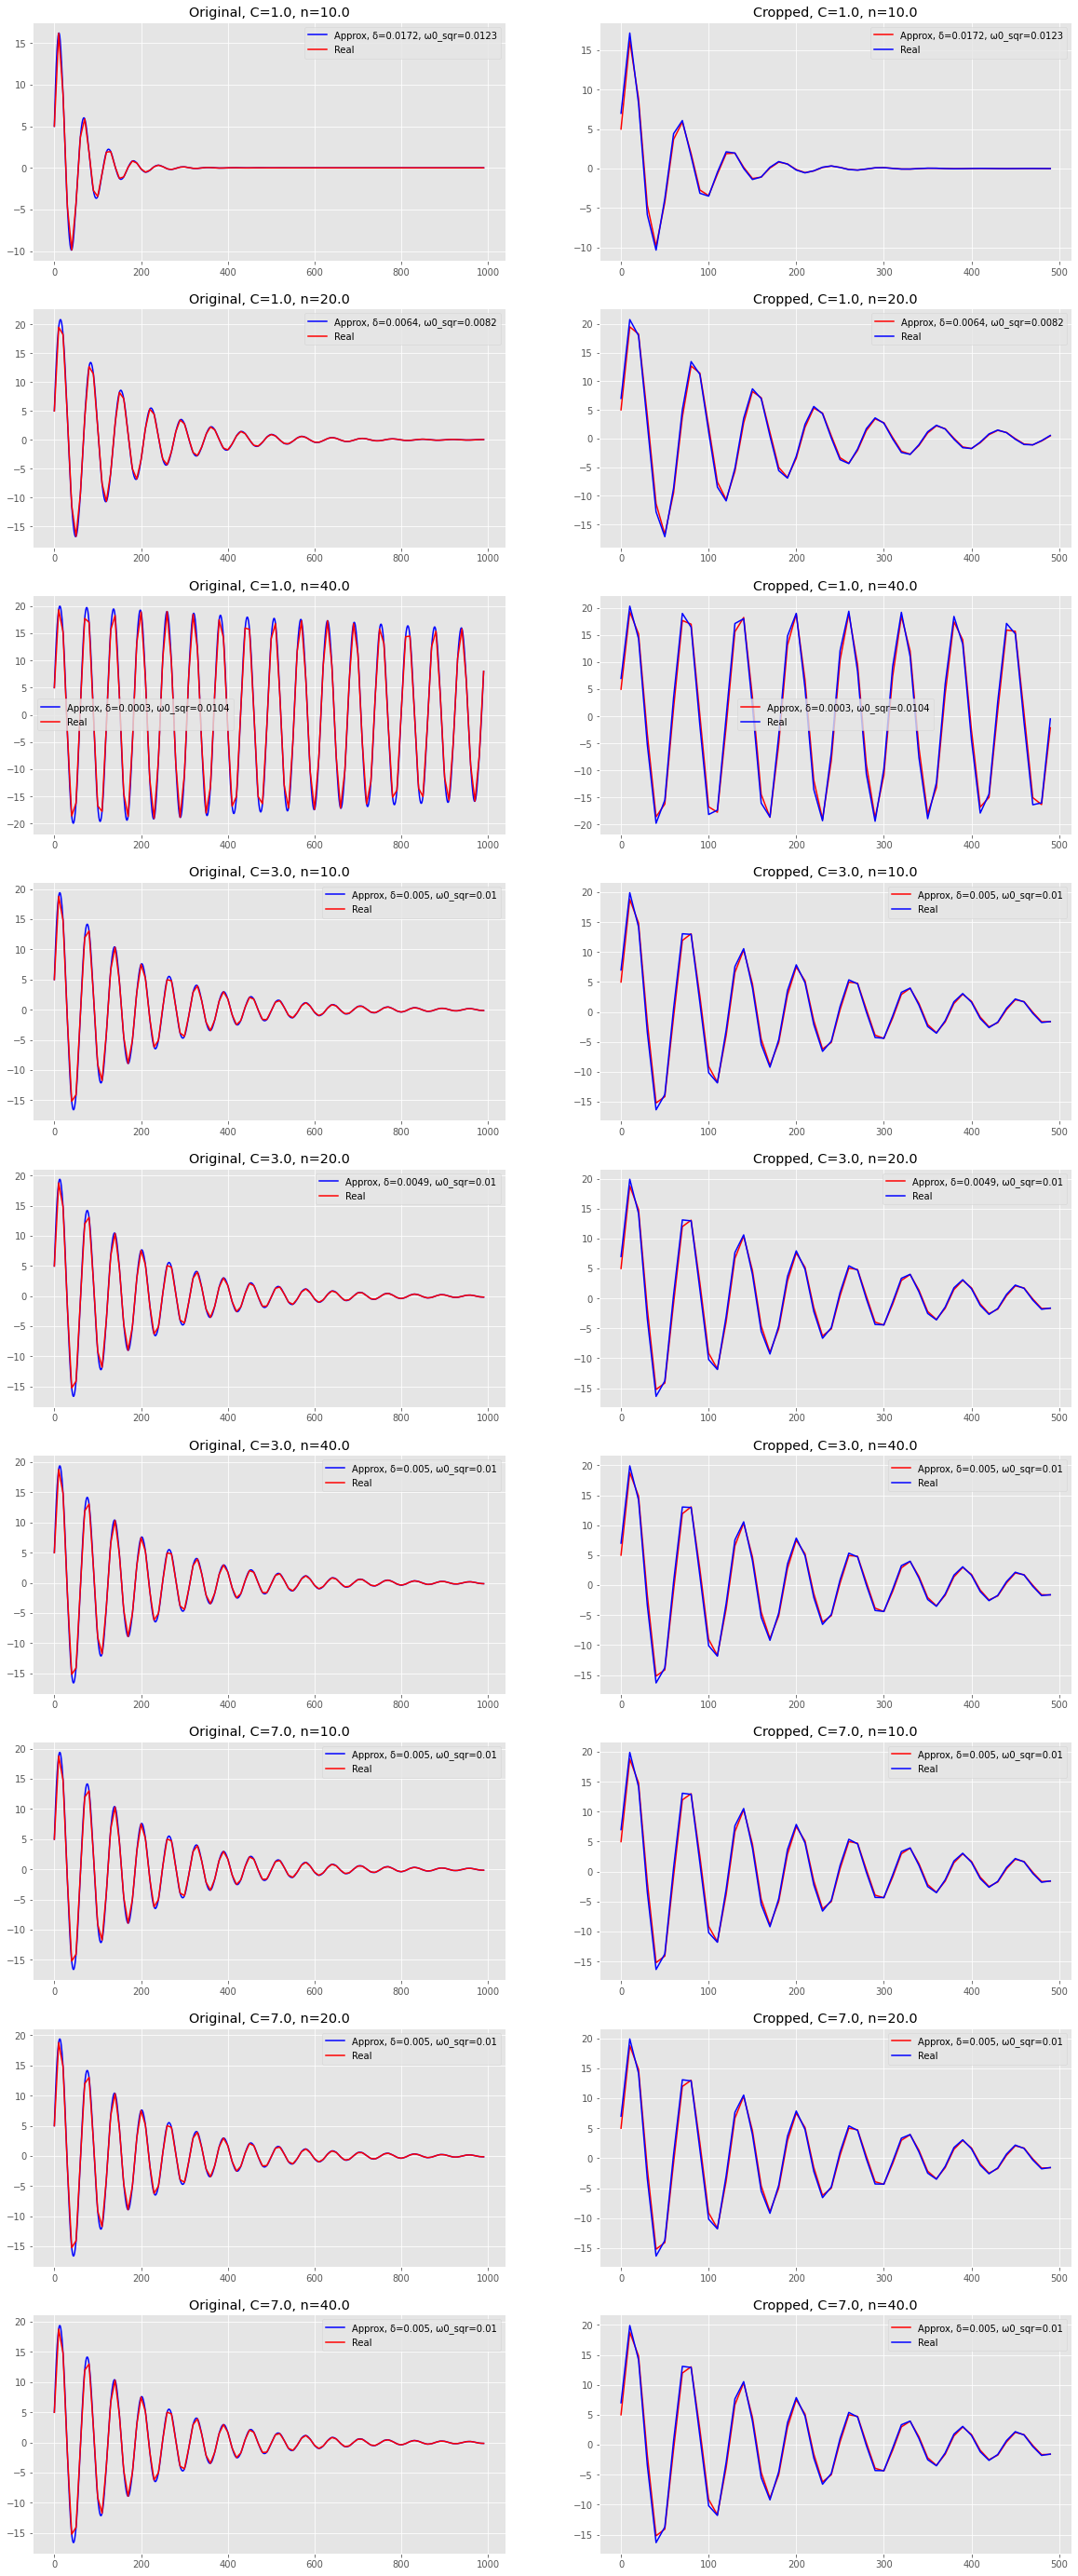

In [23]:
fig, axs = plt.subplots(nrows=param_df.shape[0], ncols=2, figsize=(20, 50))

for i in range(param_df.shape[0]):
    δ = param_df.iloc[i]['δ*']
    ω0_sqr = param_df.iloc[i]['ω0_sqr*']
    C = param_df.iloc[i]['C']
    n = param_df.iloc[i]['n']
    
    x = odeint(ZgasColiv, np.array([x0, x00]), T, (δ, ω0_sqr))
    x1 = x0 + x00
    x11 = x00
    x_1 = odeint(ZgasColiv, np.array([x1, x11]), T+1, (δ, ω0_sqr))
        
    param_df.loc[i, 'RMSE'] = np.sqrt(mean_squared_error(x, x_1))
    f = interp1d(T, x[:, 0], kind='quadratic')
    t_new = np.linspace(T[0], T[-1], 10000)
    axs[i][0].plot(t_new, f(t_new), color='blue')
    axs[i][0].plot(T, x[:, 0], color='red')
    #axs[i][0].plot(T, x_1[:, 0], color='blue')
    
    axs[i][1].plot(T[:50], x[:50, 0], color='red')
    axs[i][1].plot(T[:50], x_1[:50, 0], color='blue')
    
    axs[i][0].legend(['Approx, δ={}, ω0_sqr={}'.format(round(δ, 4), round(ω0_sqr, 4)), 'Real'])
    axs[i][1].legend(['Approx, δ={}, ω0_sqr={}'.format(round(δ, 4), round(ω0_sqr, 4)), 'Real'])
    
    axs[i][0].set_title("Original, C={}, n={}".format(C, n))
    axs[i][1].set_title("Cropped, C={}, n={}".format(C, n))
    
    print('Iter: {}, RMSE: {}, δ: {}, ω0_sqr: {}'.format(i, np.sqrt(mean_squared_error(x_1, x)), 
                                                         δ, ω0_sqr))

In [24]:
param_df

,C,n,θ_1*,θ_2*,δ*,ω0_sqr*,RMSE
0,1.0,10.0,1.953314,-0.965644,0.017178,0.012330,0.205632
1,1.0,20.0,1.978974,-0.987170,0.006415,0.008196,0.300256
2,1.0,40.0,1.989126,-0.999496,0.000252,0.010370,0.896735
3,3.0,10.0,1.980026,-0.990012,0.004994,0.009985,0.334845
4,3.0,20.0,1.980109,-0.990103,0.004949,0.009993,0.336212
5,3.0,40.0,1.980017,-0.989997,0.005001,0.009980,0.334629
6,7.0,10.0,1.980000,-0.990000,0.005000,0.010000,0.334667
7,7.0,20.0,1.980000,-0.990000,0.005000,0.010000,0.334667
8,7.0,40.0,1.980000,-0.990000,0.005000,0.010000,0.334668


# **лістинг для дослідження закономірностей задачі структурно параметричної ідентифікації**

n = 10
sigma = 0.1
X:[[6.38508532 8.35588376 2.97133111 8.22981833 6.48553514]
 [2.07949798 2.36219035 5.5324636  8.04437948 4.51184665]
 [9.93104832 0.75779955 4.85560772 4.3553586  5.61034092]
 [3.30721896 6.33628346 2.18345274 5.26134247 9.46130216]
 [3.05727097 5.27963498 8.33029788 4.57110933 3.14783086]
 [5.36666963 9.77509586 9.3296197  2.91337501 2.95344245]
 [6.88728816 6.56074196 5.42355683 3.84574857 8.73783417]
 [0.24546946 9.65543067 8.11766651 2.22789294 4.8662604 ]
 [4.69436507 1.69791415 9.34339654 9.09626225 9.10109531]
 [5.9619011  3.35184436 5.08764823 0.16895644 6.72477427]]
y:[  5.42719318   7.04549286  33.14178931  -0.57369888   6.93965386
   5.87019444  12.96545572 -10.44853858  20.04233027  16.26496978]
		********

КРОК №1
θ1: [2.37358725]
RSS1: 525.6989487191304
H1^-1:
[[0.00335704]]
		********

		********

КРОК №2
θ2: [ 3.46705443 -1.41093067]
RSS2: 105.60554981012001
H2^-1:
[[ 0.00620324 -0.00367253]
 [-0.00367253  0.00473877]]
		********

		********

КРОК №3

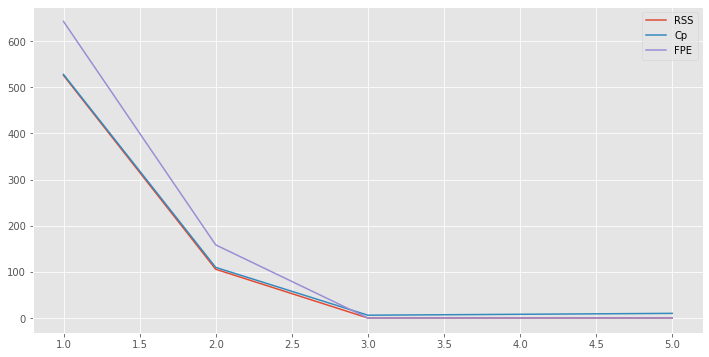

     s         RSS          Cp         FPE
0  1.0  525.698949  527.698949  642.520937
1  2.0  105.605550  109.605550  158.408325
2  3.0    0.000531    6.000531    0.000987
3  4.0    0.000437    8.000437    0.001019
4  5.0    0.000436   10.000436    0.001309
n = 10
sigma = 0.5
X:[[4.46726825 8.78204754 2.47328864 7.97093076 4.53554151]
 [5.2316664  9.55599523 1.71229361 6.78784955 9.42945573]
 [3.07866959 8.99605703 4.53730441 3.71441388 5.95804528]
 [9.11395961 2.3295479  6.66184357 1.7083253  3.95507854]
 [3.70795981 2.71795202 4.90367418 1.11420259 0.26461858]
 [6.8097406  1.80576334 0.80264714 8.22505204 3.92045861]
 [5.8700645  0.86536703 0.85854754 9.2659635  2.19800867]
 [1.16395265 1.79482244 1.75038528 8.76988524 1.01611706]
 [5.39828175 6.67209507 6.18706268 4.77906214 2.89080109]
 [5.70592866 9.32943122 2.69483151 0.71760336 8.75820496]]
y:[-1.69863026 -1.7138708  -4.21057575 29.35342411 10.59929486 17.62354863
 16.73059585  1.64203459  9.03870616  1.14714926]
		********

КРО

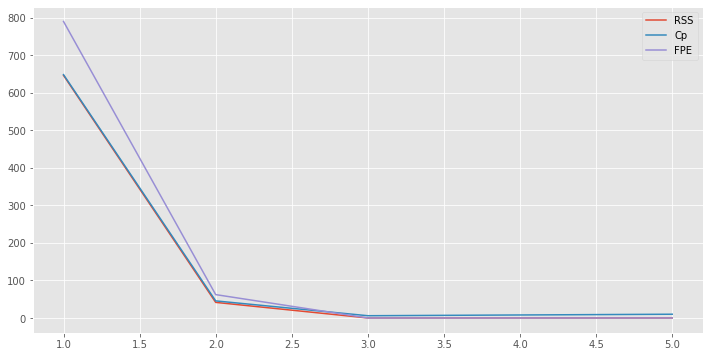

     s         RSS          Cp         FPE
0  1.0  646.622500  648.622500  790.316388
1  2.0   41.524776   45.524776   62.287164
2  3.0    0.000327    6.000327    0.000608
3  4.0    0.000228    8.000228    0.000533
4  5.0    0.000228   10.000228    0.000683
n = 10
sigma = 1
X:[[6.27829657 6.15554482 4.49379271 3.58050007 5.35853267]
 [0.33921073 8.40561753 9.111003   3.89421337 5.59541137]
 [4.41315604 6.61321463 0.98432627 3.77480654 9.0577885 ]
 [7.35734017 2.50813133 1.31569691 0.98449737 3.91919421]
 [2.84731103 8.89955434 2.28933386 7.69532889 8.09219047]
 [3.18310778 8.38448835 8.42896991 7.02637584 4.59346109]
 [4.76675567 3.70795911 6.17643698 9.6861903  5.3984848 ]
 [4.69052668 1.55775823 4.42635034 9.15323812 7.61816798]
 [2.14876389 7.12939628 7.14610075 3.85511004 9.33481052]
 [9.00488461 7.22146726 5.5851807  9.01894983 5.3482846 ]]
y:[11.01134239 -6.69069065  1.01114919 18.37311551 -6.96141762  1.20751512
 13.06482608 15.37393624 -0.67712236 18.15142222]
		********

КРОК 

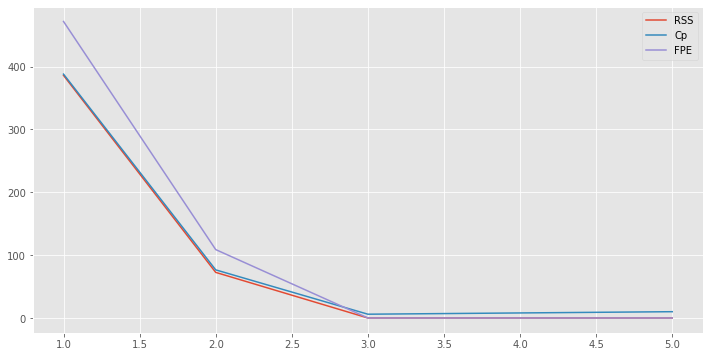

     s         RSS          Cp         FPE
0  1.0  385.946964  387.946964  471.712956
1  2.0   72.542563   76.542563  108.813845
2  3.0    0.000279    6.000279    0.000519
3  4.0    0.000242    8.000242    0.000565
4  5.0    0.000241   10.000241    0.000723
n = 30
sigma = 0.1
X:[[9.49714101 7.00513595 5.50438141 4.22859295 7.15950639]
 [9.18043562 6.60858524 4.97169852 6.78875611 0.98998707]
 [1.52605516 3.9226363  6.176059   8.00315836 5.84741922]
 [7.1434524  4.47559332 9.78556373 6.36788118 4.57795877]
 [1.26604159 2.18306157 4.32919782 9.7817032  1.2466135 ]
 [1.34432471 2.13678379 7.59621053 8.53405195 8.57542103]
 [4.90655262 9.04378039 3.23362167 1.91336173 8.59260293]
 [4.03696252 3.2633445  1.01747491 9.18741305 3.87517656]
 [0.22507933 7.7130401  3.46069711 1.30729126 1.57298465]
 [6.65959129 8.86892698 1.81615119 9.13094192 4.86828934]
 [3.06817184 0.92255161 0.27249092 5.24476204 6.42181544]
 [3.49039681 3.4436108  0.98703392 5.17378051 8.0316575 ]
 [6.19388505 8.52774924 4

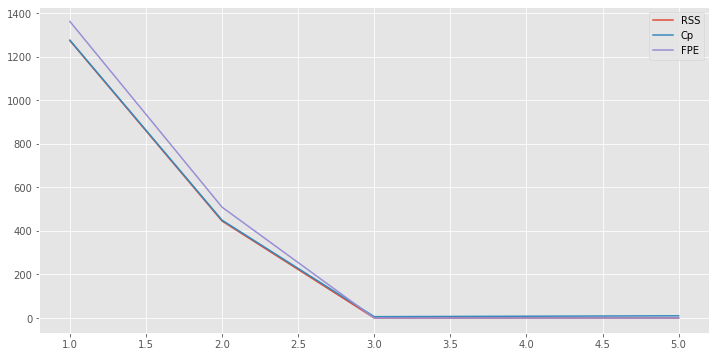

     s          RSS           Cp          FPE
0  1.0  1273.437888  1275.437888  1361.261190
1  2.0   445.067396   449.067396   508.648453
2  3.0     0.002571     6.002571     0.003143
3  4.0     0.002571     8.002571     0.003362
4  5.0     0.002550    10.002550     0.003570
n = 30
sigma = 0.5
X:[[2.35709158 1.10290349 3.74998779 5.16086071 8.43668636]
 [9.46337817 0.52807975 0.98070685 3.15003189 8.4681869 ]
 [7.02595278 2.82429987 9.80488862 9.51192149 7.45164468]
 [2.62994944 7.95750618 7.46332442 5.01210112 2.62412782]
 [7.15216672 2.27471678 1.9782332  8.02517387 4.31049781]
 [7.65702933 6.59783245 1.77047589 0.14501419 9.43626093]
 [8.57856224 6.17065591 4.71237382 0.89841142 2.42966798]
 [4.01782381 7.51771261 7.58879329 9.06108086 8.55251218]
 [2.63238618 6.34586737 9.3264827  2.72152786 8.60168652]
 [3.94777307 5.87757526 2.88555275 3.32713002 6.3084427 ]
 [4.09489512 1.12501599 9.70730133 3.73671594 0.99786026]
 [8.73128907 8.46538042 6.63123774 4.30320621 5.18232207]
 [5.593

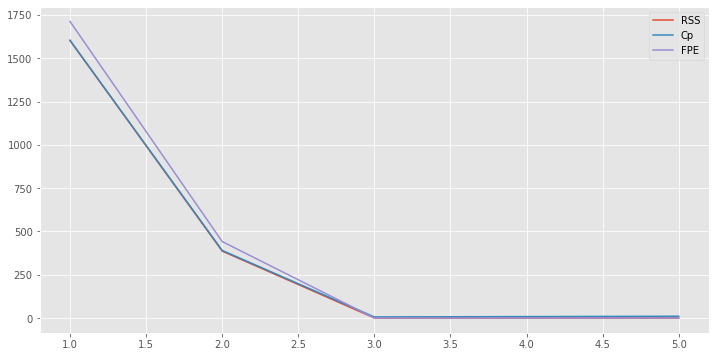

     s          RSS           Cp          FPE
0  1.0  1601.790482  1603.790482  1712.258791
1  2.0   386.092534   390.092534   441.248611
2  3.0     0.002867     6.002867     0.003505
3  4.0     0.002864     8.002864     0.003745
4  5.0     0.002532    10.002532     0.003545
n = 30
sigma = 1
X:[[4.93337835 9.4577822  2.75937084 2.4138561  9.56518659]
 [2.21907139 0.98598497 0.57639006 7.63607528 4.90669968]
 [1.94020354 3.67204134 5.61427791 0.74829895 8.42860919]
 [9.49264254 4.94207744 6.68290029 6.97980077 7.09583048]
 [7.98333035 9.95470724 8.96761399 9.47132351 2.33246919]
 [6.72373868 9.57304458 4.66208356 9.01865195 2.34799663]
 [8.12447819 5.46399268 3.91231581 6.79015376 5.84671278]
 [4.47958558 2.52190063 8.59842446 5.60734313 0.89932775]
 [6.12701172 6.81829967 9.76055644 1.45643286 7.92289299]
 [3.22432316 9.3597235  4.56564749 8.89985482 3.08173573]
 [9.68433782 2.59871418 2.48796246 3.04394021 1.19763204]
 [5.32792579 3.25686389 7.20806213 7.73186339 7.13235593]
 [8.69301

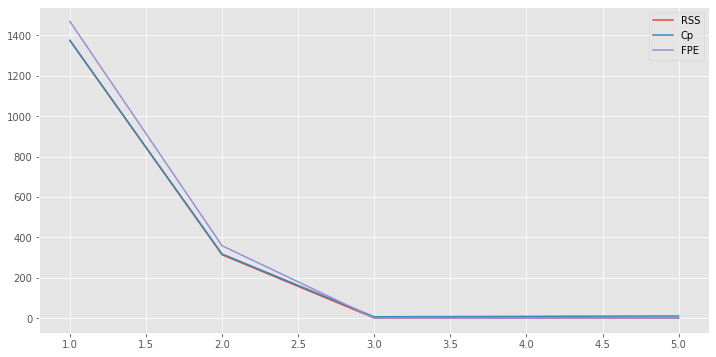

     s          RSS           Cp          FPE
0  1.0  1374.323609  1376.323609  1469.104548
1  2.0   313.240866   317.240866   357.989561
2  3.0     0.002967     6.002967     0.003626
3  4.0     0.002610     8.002610     0.003413
4  5.0     0.002510    10.002510     0.003514
n = 100
sigma = 0.1
X:[[9.71699117 6.53121594 7.99469325 4.66889153 2.72306281]
 [5.01075302 5.99476117 3.73077189 5.21223847 6.3383864 ]
 [7.99206092 9.37226734 4.63338081 3.60433966 5.22038469]
 [0.12585418 4.49806555 6.95128061 3.78617871 0.65108481]
 [3.40942494 8.05172415 3.36055102 7.9447318  1.45376805]
 [8.35002886 4.25961211 3.82507546 8.28784862 8.62880461]
 [5.1945951  7.55866174 0.63306122 3.89593545 0.78822578]
 [1.27657885 2.61076429 3.065137   2.21360769 6.40178031]
 [8.84924849 2.75567963 4.6398041  7.55699862 7.74670342]
 [9.36279871 2.68444712 6.27737304 6.20779617 8.29177889]
 [7.39241799 7.47493891 4.62188134 5.17085074 8.64425047]
 [6.34178499 7.24664776 4.23053637 3.67695893 6.64783839]
 [3.01

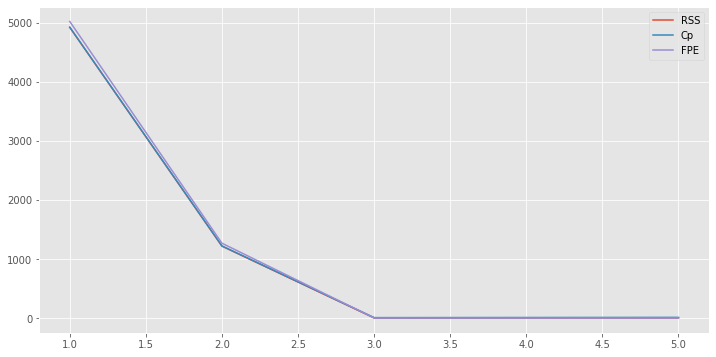

     s          RSS           Cp          FPE
0  1.0  4924.444037  4926.444037  5023.927755
1  2.0  1216.860092  1220.860092  1266.527850
2  3.0     0.009494     6.009494     0.010081
3  4.0     0.009487     8.009487     0.010278
4  5.0     0.009158    10.009158     0.010122
n = 100
sigma = 0.5
X:[[4.52765483e+00 4.30114271e+00 4.51323829e-01 5.49470346e+00
  6.07942197e+00]
 [8.36646473e+00 9.00283515e+00 4.91931746e+00 3.01199405e+00
  7.73753704e+00]
 [1.43698129e+00 7.68252333e+00 7.11964322e+00 6.03664056e+00
  1.33040236e+00]
 [9.05391007e-01 8.47194187e+00 4.57062038e+00 4.70956823e+00
  4.69303367e+00]
 [1.71032039e+00 7.89742556e+00 8.83968791e+00 2.18267553e+00
  1.04867420e+00]
 [9.58694701e-01 9.46665058e+00 2.91862638e+00 1.58111436e+00
  4.07690552e+00]
 [5.10367691e+00 7.62388443e+00 2.38075814e+00 8.38420541e+00
  3.98753854e+00]
 [2.65742417e+00 4.82236258e+00 6.59519026e+00 7.02891129e+00
  6.88732679e+00]
 [7.37613364e+00 7.20266519e+00 9.62930933e+00 8.84377092e-01


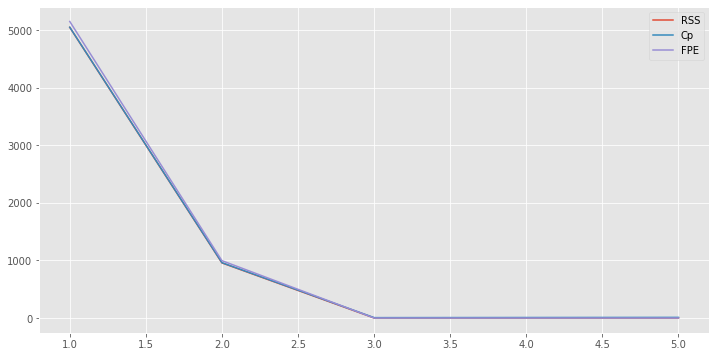

     s          RSS           Cp          FPE
0  1.0  5050.167759  5052.167759  5152.191350
1  2.0   956.667891   960.667891   995.715560
2  3.0     0.006710     6.006710     0.007125
3  4.0     0.006660     8.006660     0.007215
4  5.0     0.006652    10.006652     0.007353
n = 100
sigma = 1
X:[[5.43042945e+00 5.19715869e+00 8.33629639e+00 8.95555219e-01
  7.43249438e+00]
 [1.61696054e+00 8.41553675e+00 3.34074696e+00 8.11374088e+00
  4.64249297e+00]
 [2.41274971e+00 1.51561394e+00 5.05487757e+00 7.79032580e+00
  5.80233832e+00]
 [9.12818849e+00 3.63254444e+00 3.20779774e-01 1.76738449e+00
  5.31034172e+00]
 [7.74516948e+00 6.23723745e+00 5.14382069e+00 9.52222708e+00
  4.49916687e+00]
 [7.31309281e+00 6.73002946e+00 9.33981614e+00 7.94544248e+00
  7.21734145e+00]
 [5.31553147e+00 9.55374730e+00 2.48792842e+00 5.01388972e+00
  7.70542240e+00]
 [3.75189082e+00 8.31889337e+00 1.16562438e+00 4.55590786e+00
  4.99209250e+00]
 [6.85019778e+00 5.63497422e+00 5.57119804e+00 4.82203833e+00
  

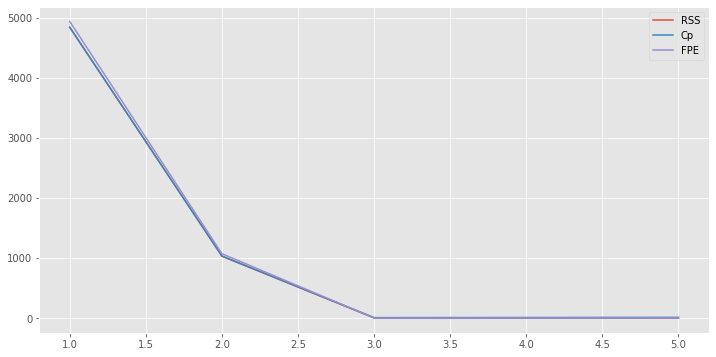

     s          RSS           Cp          FPE
0  1.0  4840.434318  4842.434318  4938.220870
1  2.0  1028.153621  1032.153621  1070.119074
2  3.0     0.012453     6.012453     0.013223
3  4.0     0.012436     8.012436     0.013472
4  5.0     0.011911    10.011911     0.013164


In [25]:
m = 5
n_list = [10, 30, 100]
theta = np.array([3, -2, 1, 0, 0])
sigma_list = [0.1, 0.5, 1]
s = 5
for n,sigma in itertools.product(n_list, sigma_list):
        X = np.random.uniform(0, 10, size=(n, m))
        ksi = np.random.normal(0, 0.01, size=n)
        y =X @ theta + ksi
        print('n = {}'.format(n))
        print('sigma = {}'.format(sigma))
        print('X:{}'.format(X))
        print('y:{}'.format(y))
        theta_pred, _, _, df = RMNK(X, y, s=s, printt=True, cr_df=True)
        #p = np.flip(np.arange(m), axis=0)
        #theta_pred, _, _, df = RMNK(X[:,p], y, s=s, printt=True, cr_df=True)
        print('Справжні значення: tetha={}'.format(theta))
        print('Оцінки: tetha*= {}'.format(theta_pred[:,0]))
        plt.plot(df['s'], df['RSS'], label='RSS')
        print_plot(df['s'], df['RSS'])
        plt.plot(df['s'], df['Cp'], label='Cp')
        print_plot(df['s'], df['Cp'])
        plt.plot(df['s'], df['FPE'], label='FPE')
        print_plot(df['s'], df['FPE'])
        plt.legend()
        plt.show()
        print(df)
